Importing the Dependencies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [59]:
#read dataset
dataset = pd.read_csv('MSFT.csv')

In [60]:
#top 5 records of dataset
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062970,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.065219,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.066344,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064657,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063533,47894400


In [61]:
#shape of dataset
dataset.shape

(8416, 7)

Data Preprocessing

In [62]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no missing values in dataset

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8416 non-null   object 
 1   Open       8416 non-null   float64
 2   High       8416 non-null   float64
 3   Low        8416 non-null   float64
 4   Close      8416 non-null   float64
 5   Adj Close  8416 non-null   float64
 6   Volume     8416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 460.4+ KB


In [64]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8.416000e+03
mean,26.724228,27.011383,26.433939,26.729012,22.012425,6.094392e+07
std,25.579483,25.799075,25.337877,25.580985,24.982907,3.891822e+07
min,0.088542,0.092014,0.088542,0.090278,0.058473,2.304000e+06
25%,3.255860,3.302735,3.214844,3.265625,2.115133,3.733340e+07
50%,26.059999,26.370001,25.750000,26.059999,18.452178,5.414265e+07
75%,33.457501,33.976248,33.000000,33.446250,25.030254,7.451730e+07
max,141.500000,141.679993,140.300003,141.339996,141.339996,1.031789e+09


Data Visualization

In [65]:
correlation = dataset.corr()
correlation

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999906,0.999885,0.999793,0.987179,-0.304672
High,0.999906,1.000000,0.999845,0.999893,0.986750,-0.302105
Low,0.999885,0.999845,1.000000,0.999905,0.987758,-0.307520
Close,0.999793,0.999893,0.999905,1.000000,0.987385,-0.304960
Adj Close,0.987179,0.986750,0.987758,0.987385,1.000000,-0.322532
Volume,-0.304672,-0.302105,-0.307520,-0.304960,-0.322532,1.000000


<AxesSubplot:>

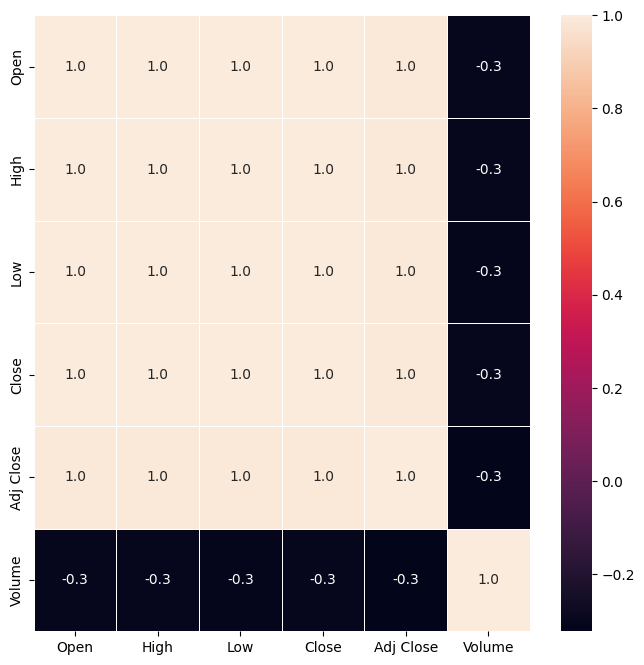

In [66]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

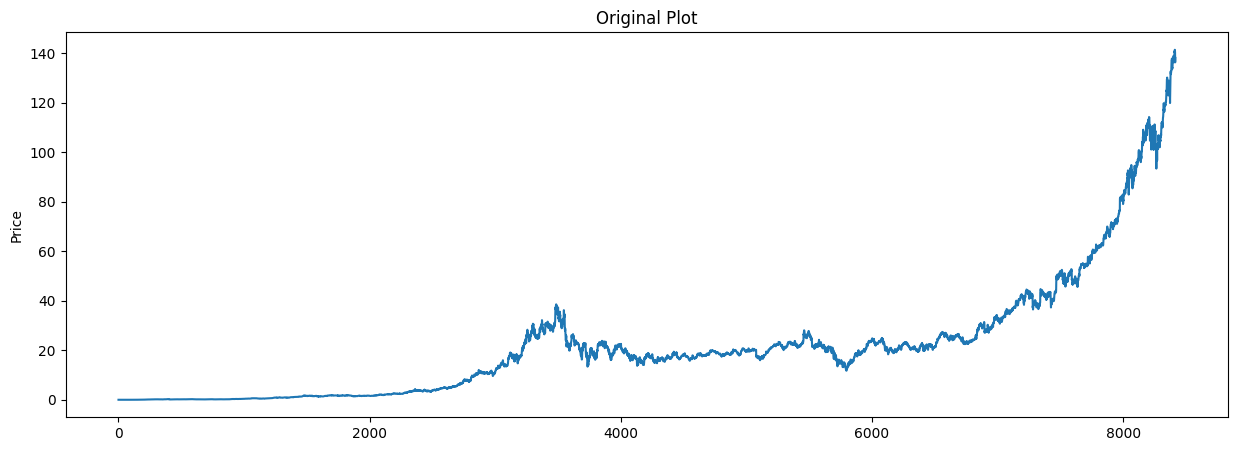

In [67]:
f,ax1 = plt.subplots(figsize=(15, 5))
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Adj Close', data = dataset)

Linear Regression

In [68]:
data = dataset.drop('Date', axis=1)
X = data.drop('Adj Close',axis=1)
Y = data['Adj Close']

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [70]:
model = LinearRegression()

In [71]:
model.fit(X_train, Y_train)

LinearRegression()

In [72]:
Y_pred = model.predict(X_test)

In [73]:
#R2_score Accuracy
print('Accuracy Score:' ,r2_score(Y_test,Y_pred))

Accuracy Score: 0.9792171848172325
